In [1]:
import pandas as pd
import numpy as np

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

import graphviz 
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.metrics import top_k_accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.decomposition import PCA

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.metrics import f1_score

In [2]:
#enade_treino = pd.read_csv("../../tabelas_cursos/tabela_final_SI_11-14_treinamento.csv")
enade_treino = pd.read_csv("../../concept_drift/tabela_final_2017_tres_anos_treinamento.csv")

numero_caracteristicas = enade_treino.shape[1] - 1
X_enade_treino = enade_treino.iloc[:, 0:numero_caracteristicas]
y_enade_treino = enade_treino.iloc[:, -1]

In [3]:
#enade_teste = pd.read_csv("../../tabelas_cursos/tabela_final_SI_2017_treinamento.csv")
enade_teste = pd.read_csv("../../concept_drift/tabela_final_2021_tres_anos_treinamento.csv")

numero_caracteristicas = enade_teste.shape[1] - 1
X_enade_teste = enade_teste.iloc[:, 0:numero_caracteristicas]
y_enade_teste = enade_teste.iloc[:, -1]

In [4]:
normalizador_treinamento = StandardScaler()

normalizador_treinamento.fit(X_enade_treino)
treinamento_normalizado = normalizador_treinamento.transform(X_enade_treino)

In [5]:
normalizador_teste = StandardScaler()

normalizador_teste.fit(X_enade_teste)
teste_normalizado = normalizador_teste.transform(X_enade_teste)

In [6]:
classificador = SVC(probability=True)

In [7]:
parametros_para_busca = {"C": [0.01, 0.1, 1, 10, 100], 
              "kernel": ["linear", "poly", "rbf"],
              "gamma": [0.1, 1, 10],
              "tol": [0.1, 0.001, 0.00001]}

In [8]:
busca = HalvingGridSearchCV(classificador, parametros_para_busca, scoring="f1_weighted").fit(treinamento_normalizado, y_enade_treino) 

KeyboardInterrupt: 

In [10]:
busca.best_estimator_.fit(treinamento_normalizado, y_enade_treino)

SVC(C=0.01, gamma=1, kernel='poly', probability=True, tol=0.1)

In [11]:
busca.best_estimator_.predict_proba(teste_normalizado)

array([[0.03223475, 0.17267263, 0.51172041, 0.21884151, 0.0645307 ],
       [0.01298824, 0.06217605, 0.26246634, 0.24074767, 0.4216217 ],
       [0.03807437, 0.18141007, 0.35624786, 0.37395128, 0.05031641],
       ...,
       [0.0657633 , 0.48208088, 0.40490014, 0.04130936, 0.00594633],
       [0.03270146, 0.34231931, 0.50136787, 0.0876883 , 0.03592306],
       [0.02821053, 0.63830636, 0.22650965, 0.0831854 , 0.02378805]])

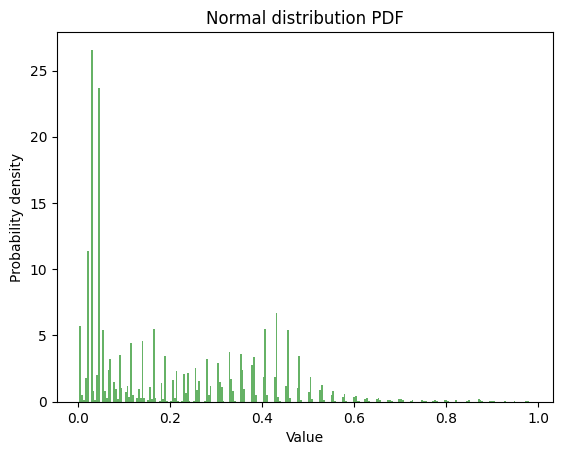

In [15]:
# Plot the PDF of the normal distribution
plt.hist(busca.best_estimator_.predict_proba(teste_normalizado), bins=40, density=True, alpha=0.6, color=['g', 'g', 'g', 'g', 'g'])
plt.xlabel('Value')
plt.ylabel('Probability density')
plt.title('Normal distribution PDF')
plt.show()

In [150]:
y_predito = busca.best_estimator_.predict(teste_normalizado)

In [151]:
f1_score(y_enade_teste, y_predito, average='weighted')

0.39891993777305657